## 0.Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import glob
import seaborn as sns

## 1. Load Dataset

In [4]:
dir = r'C:\Users\Asus\Desktop\SoH_estimation_of_Lithium-ion_battery-master\2_Elimination_of_outliers\refined_dataset'
listdir = os.listdir(dir)

print(listdir)
print("The number of dataset :", len(listdir))

['B05_discharge_soh.csv', 'B07_discharge_soh.csv', 'B18_discharge_soh.csv', 'B33_discharge_soh.csv', 'B34_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv', 'B48_discharge_soh.csv']
The number of dataset : 8


In [15]:
num = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08']
for i in range(len(listdir)):
    vector = np.zeros((1,3))
    path = os.path.join(os.getcwd(), r'C:\Users\Asus\Desktop\SoH_estimation_of_Lithium-ion_battery-master\2_Elimination_of_outliers\refined_dataset', num[i] + '_discharge_soh.csv')
    csv = pd.read_csv(path)
    df = pd.DataFrame(csv)
    
    vec = df[['cycle', 'capacity', 'SOH']]
    
    globals()['data_{}'.format(num[i])] = vec

In [16]:
data = pd.read_csv(r'C:\Users\Asus\Desktop\SoH_estimation_of_Lithium-ion_battery-master\2_Elimination_of_outliers\refined_dataset/C01_discharge_soh.csv')
df = pd.DataFrame(data)
df

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244
...,...,...,...,...,...,...,...,...,...
50280,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,168,0.662540
50281,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,168,0.662540
50282,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,168,0.662540
50283,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,168,0.662540


In [7]:
data_B05  ## result

,cycle,capacity,SOH
0,1,1.856487,0.928244
1,1,1.856487,0.928244
2,1,1.856487,0.928244
3,1,1.856487,0.928244
4,1,1.856487,0.928244
...,...,...,...
50280,168,1.325079,0.662540
50281,168,1.325079,0.662540
50282,168,1.325079,0.662540
50283,168,1.325079,0.662540


In [8]:
for i in range(len(listdir)):
    print("Shape of data :", np.shape(globals()['data_{}'.format(num[i])]))

Shape of data : (50285, 3)
Shape of data : (50285, 3)
Shape of data : (34866, 3)
Shape of data : (42200, 3)
Shape of data : (45909, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)
Shape of data : (23478, 3)


## 3. Visualiztion of SoH

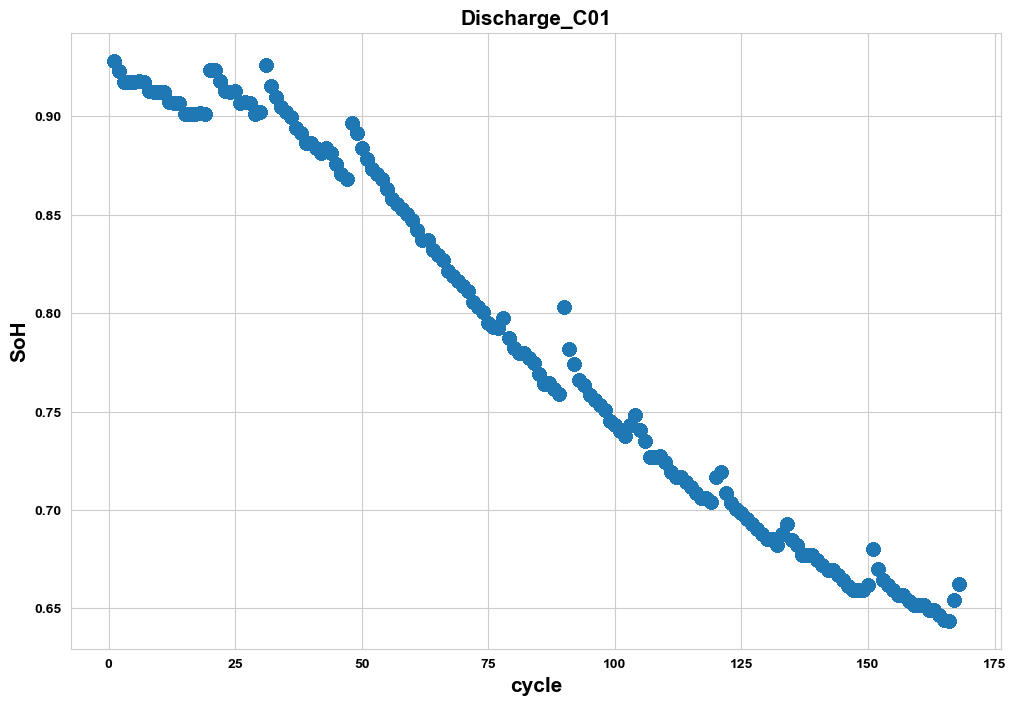

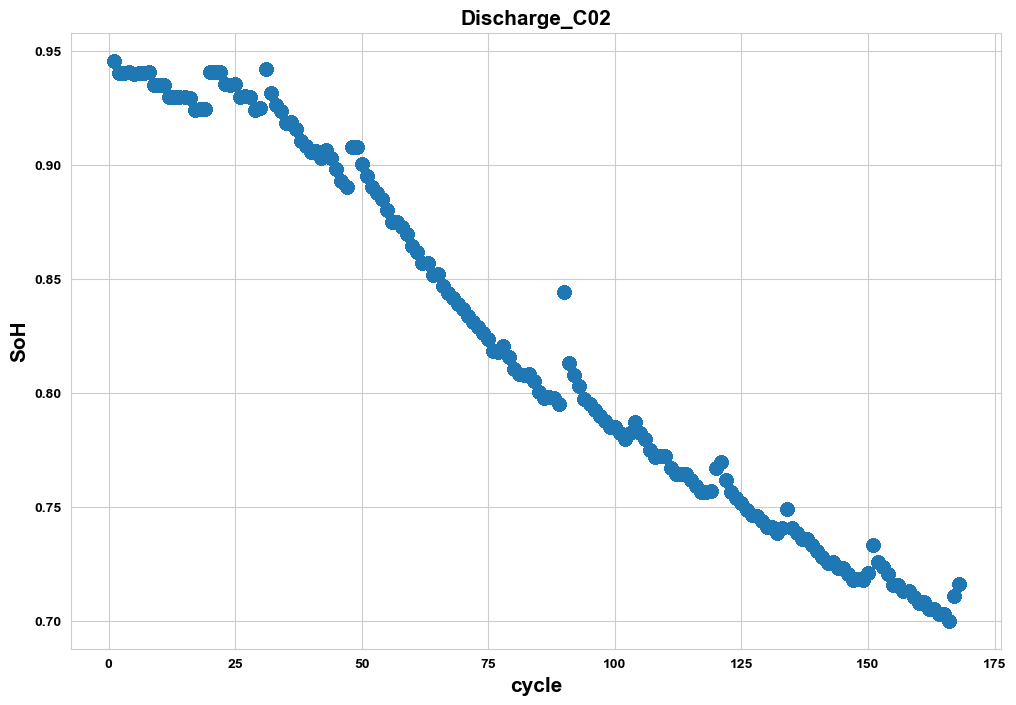

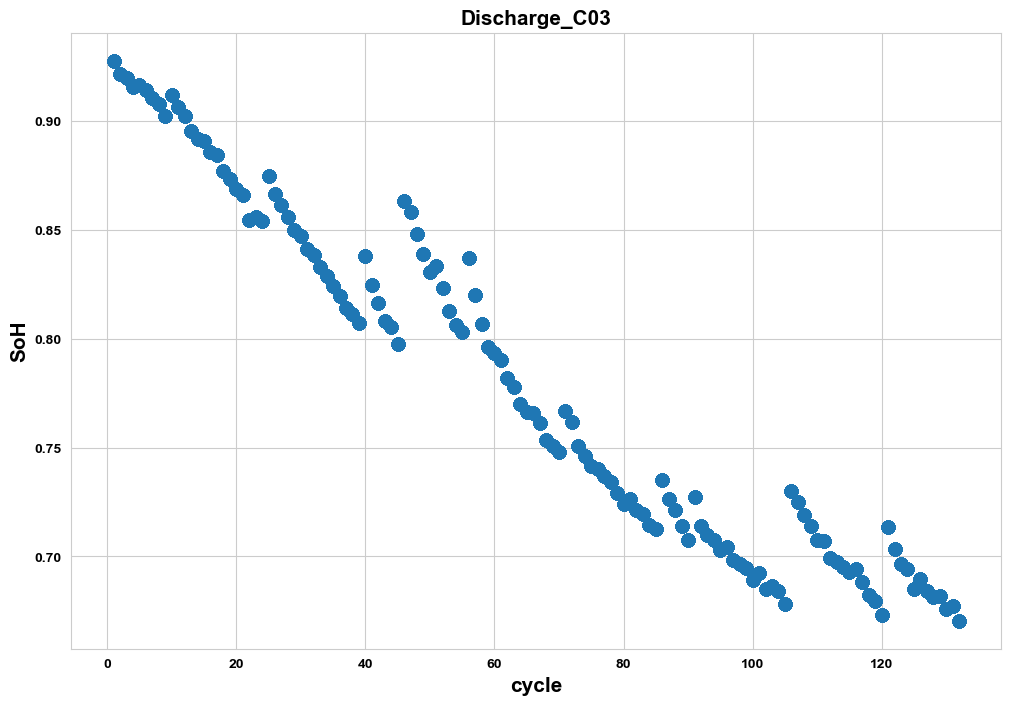

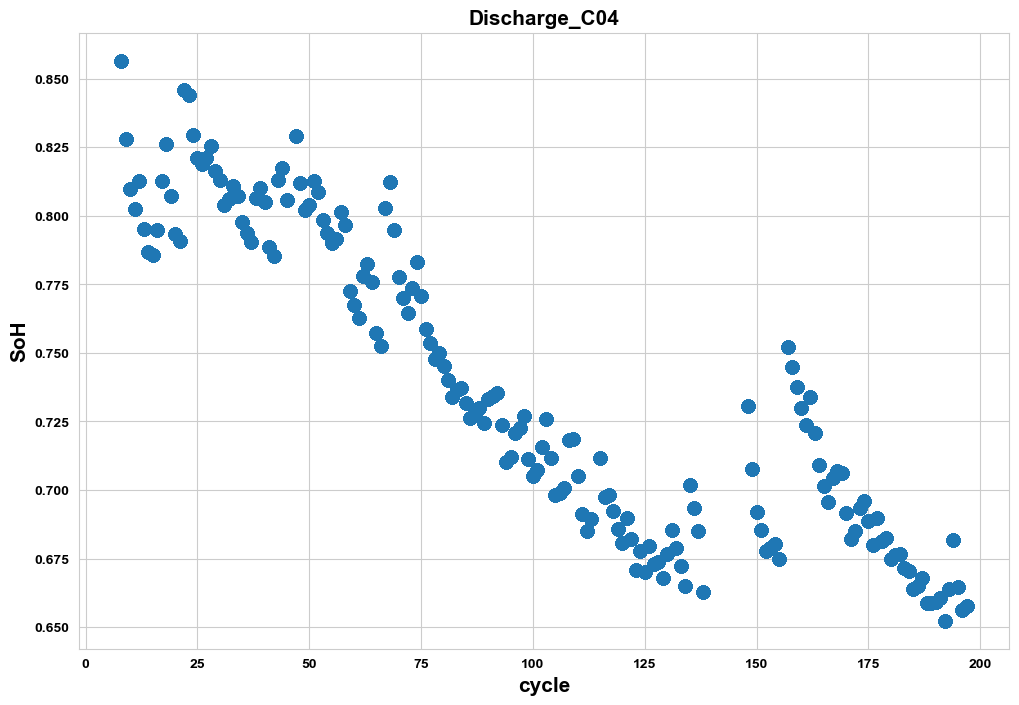

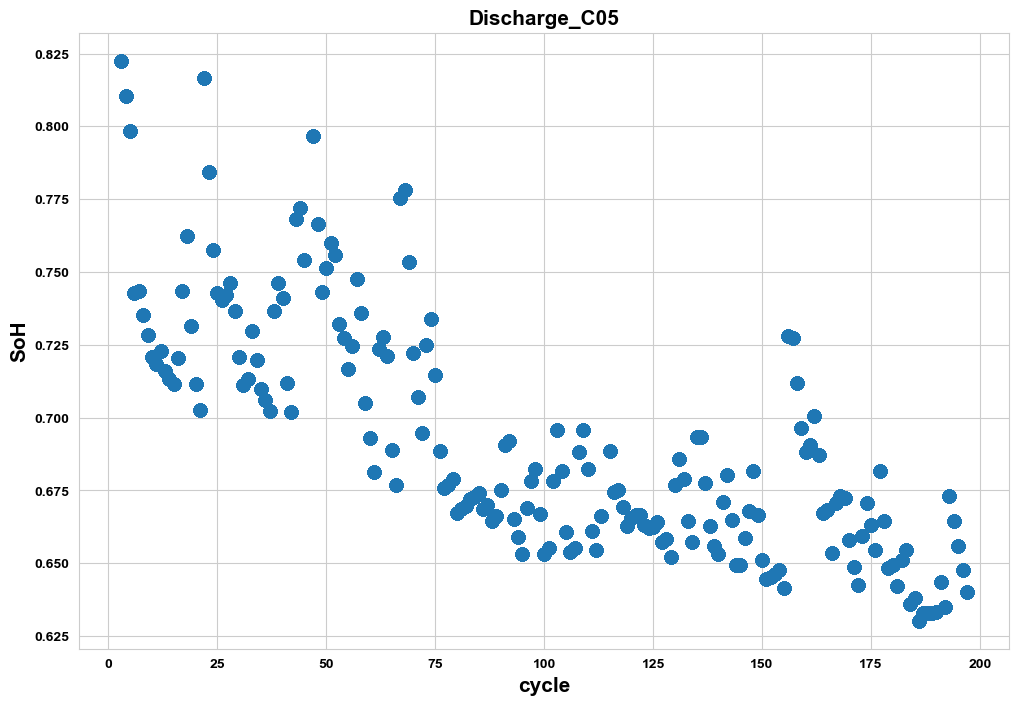

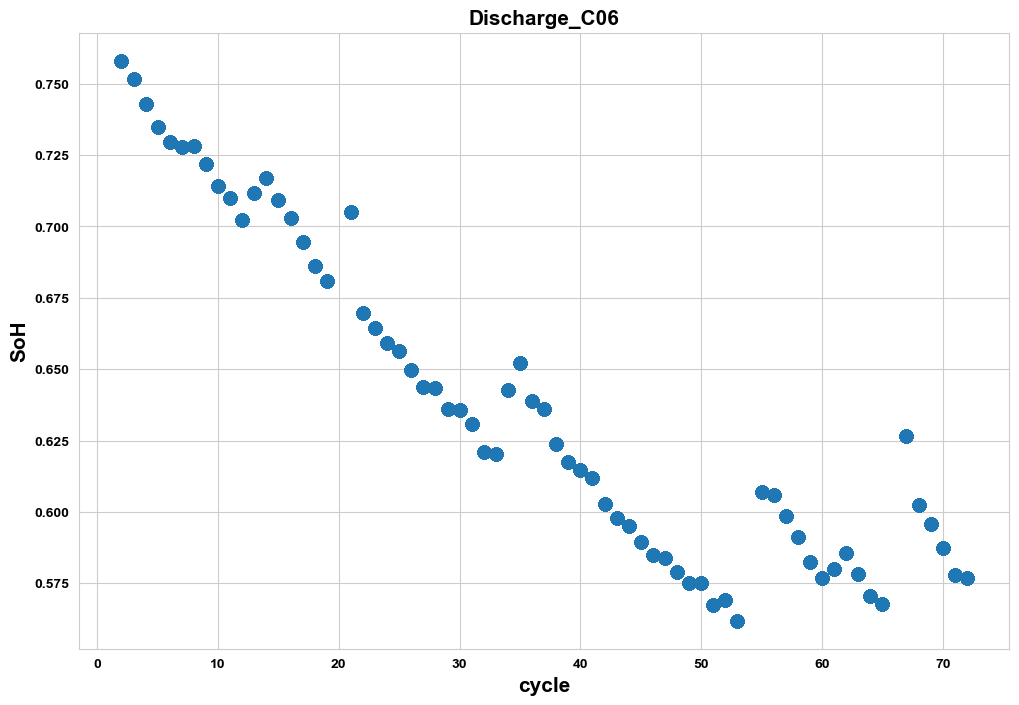

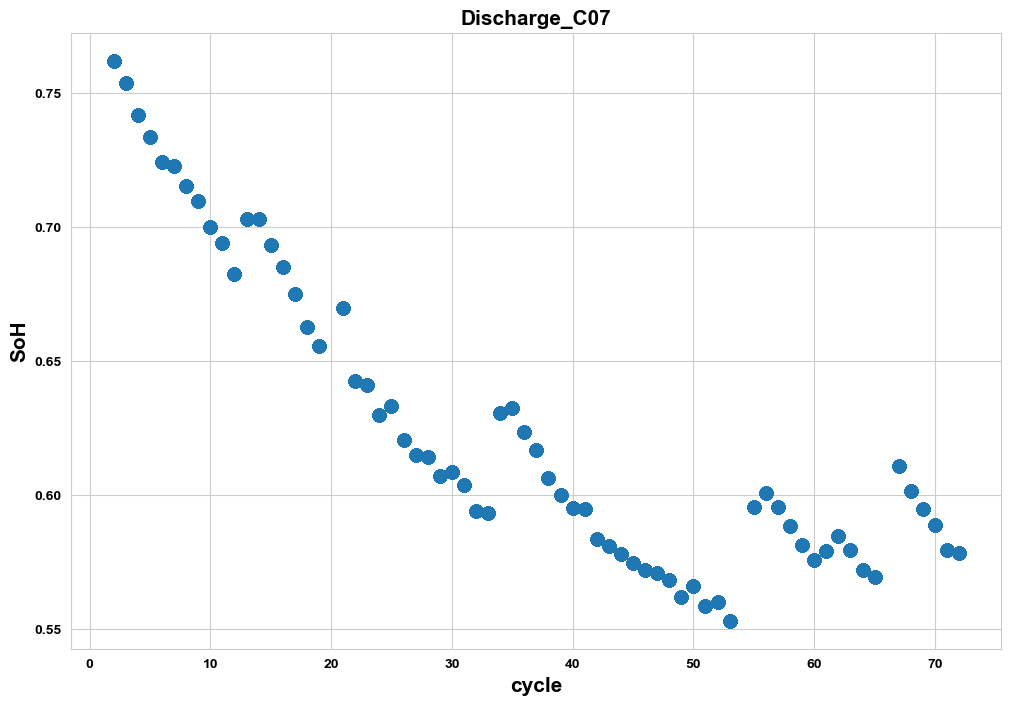

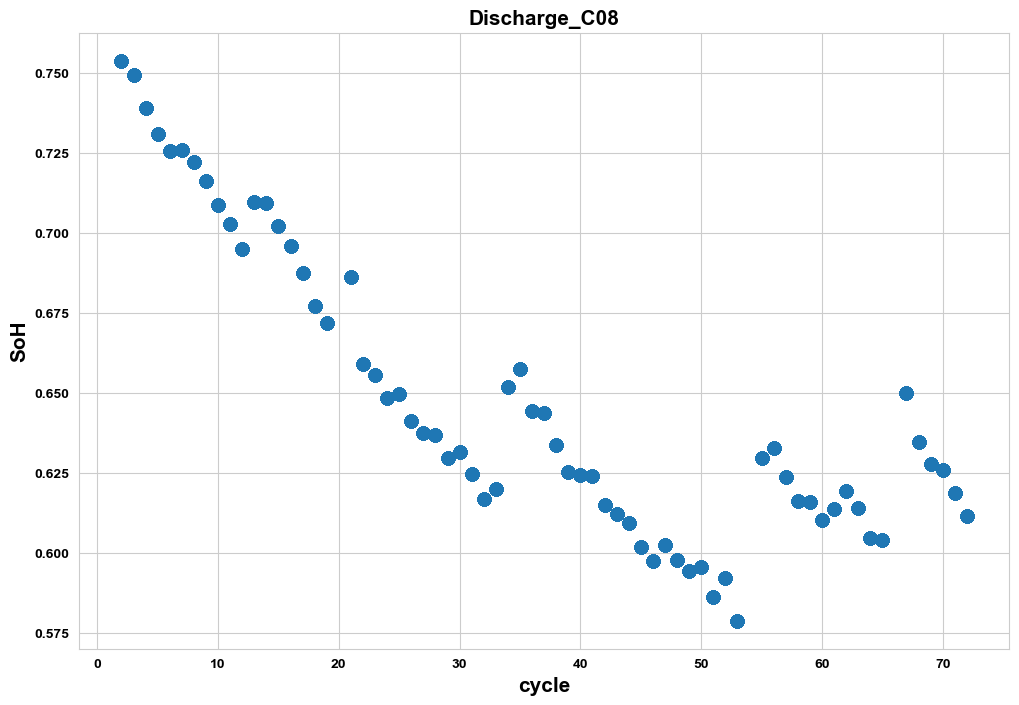

In [17]:
for i in range(len(listdir)) :

    dff = globals()['data_{}'.format(num[i])]
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    plt.scatter(dff['cycle'], dff['SOH'],  linewidth=4)
#     plt.plot(dff['cycle'], len(dff['cycle'])*[0.7], color = 'red')

    plt.ylabel('SoH', fontsize = 15, fontweight='bold', color='black')
    plt.xlabel('cycle', fontsize = 15, fontweight='bold', color='black')
    plt.title('Discharge_' + num[i], fontsize = 15, fontweight='bold', color='black')
    plt.xticks(color='black', fontweight='bold',  fontsize = 10)
    plt.yticks(color='black', fontweight='bold',  fontsize = 10)
    plt.savefig(r'C:\Users\Asus\Desktop\SOH output\refined_SoH_' + num[i] + '.png', dpi=600)
    plt.show()

## 3-1. group_A

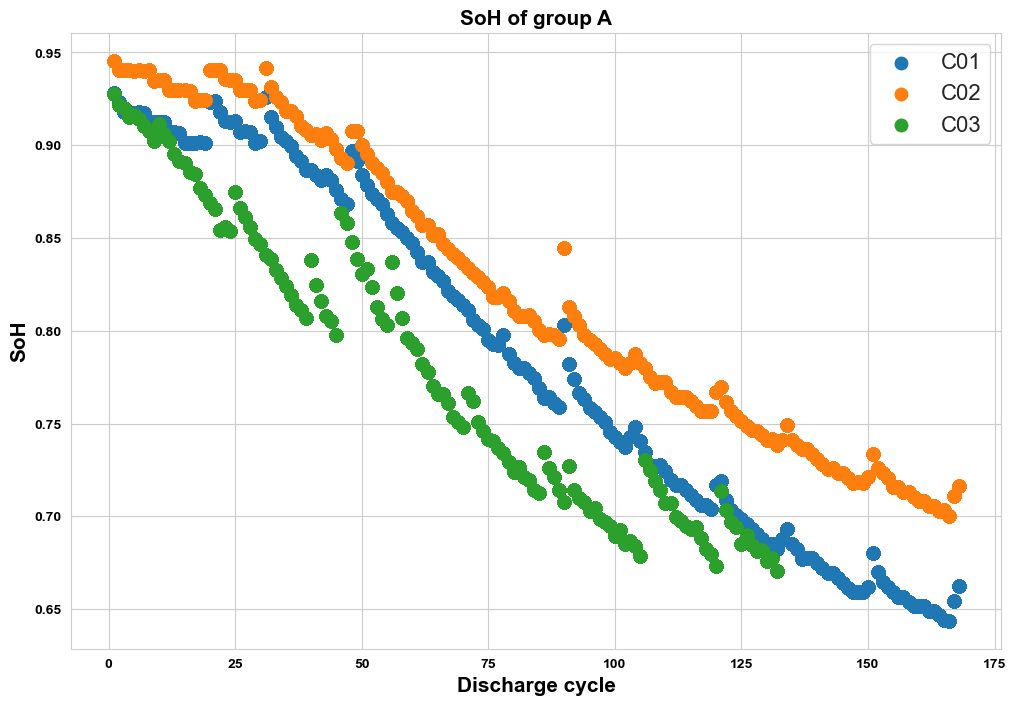

In [11]:
# Group A

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_C01['cycle'], data_B05['SOH'],label='C01',  linewidth=4)
plt.scatter(data_C02['cycle'], data_B07['SOH'],label='C02',  linewidth=4)
plt.scatter(data_C03['cycle'], data_B18['SOH'],label='C03',  linewidth=4)

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15, fontweight='bold', color='black')
plt.xlabel('Discharge cycle', fontsize = 15, fontweight='bold', color='black')
plt.title('SoH of group A',fontsize = 15, fontweight='bold', color='black')
plt.xticks(color='black', fontweight='bold',  fontsize = 10)
plt.yticks(color='black', fontweight='bold',  fontsize = 10)
plt.savefig(r'C:\Users\Asus\Desktop\SOH output\A_group.png', dpi=600)
plt.show()

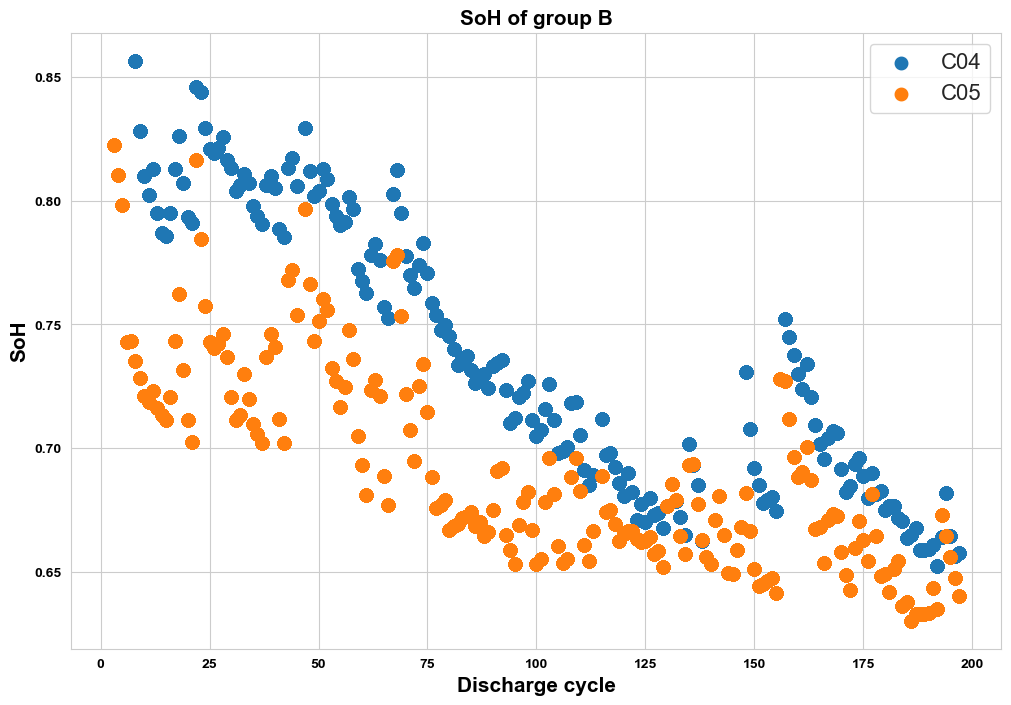

In [12]:
# Group B

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_C04['cycle'], data_B33['SOH'],label='C04',  linewidth=4)
plt.scatter(data_C05['cycle'], data_B34['SOH'],label='C05',  linewidth=4)

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15, fontweight='bold', color='black')
plt.xlabel('Discharge cycle', fontsize = 15, fontweight='bold', color='black')
plt.title('SoH of group B',fontsize = 15, fontweight='bold', color='black')
plt.xticks(color='black', fontweight='bold',  fontsize = 10)
plt.yticks(color='black', fontweight='bold',  fontsize = 10)
plt.savefig(r'C:\Users\Asus\Desktop\SOH output\B_group.png', dpi=600)
plt.show()

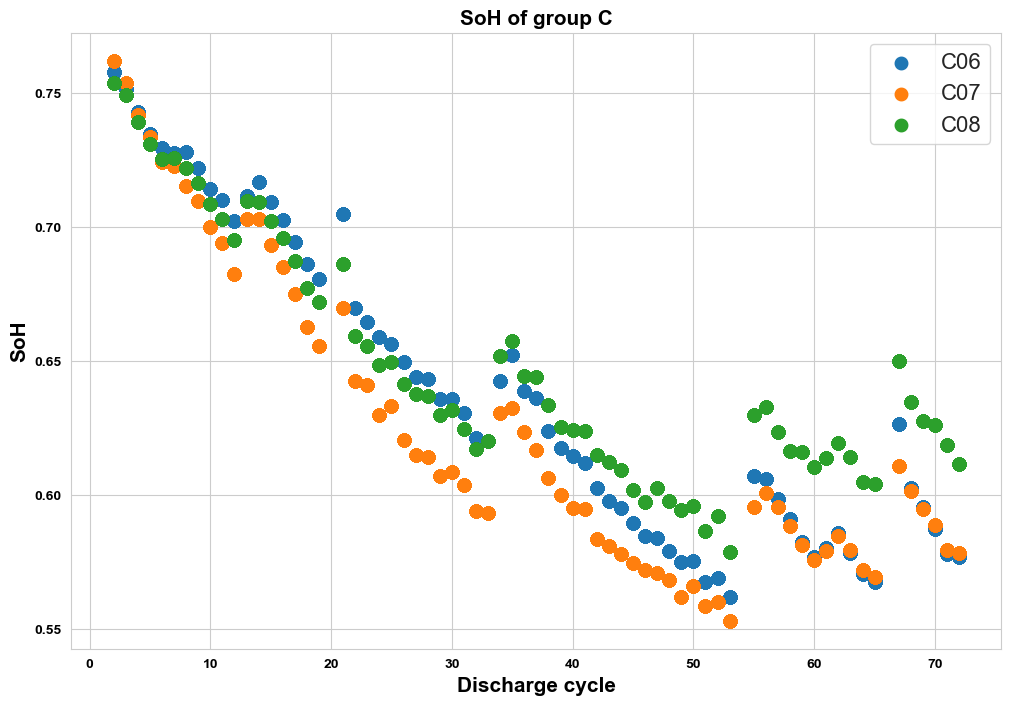

In [13]:
# Group C

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_C06['cycle'], data_B46['SOH'],label='C06',  linewidth=4)
plt.scatter(data_C07['cycle'], data_B47['SOH'],label='C07',  linewidth=4)
plt.scatter(data_C08['cycle'], data_B48['SOH'],label='C08',  linewidth=4)

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15, fontweight='bold', color='black')
plt.xlabel('Discharge cycle',fontsize = 15, fontweight='bold', color='black')
plt.title('SoH of group C', fontsize = 15, fontweight='bold', color='black')
plt.xticks(color='black', fontweight='bold',  fontsize = 10)
plt.yticks(color='black', fontweight='bold',  fontsize = 10)
plt.savefig(r'C:\Users\Asus\Desktop\SOH output\C_group.png', dpi=600)
plt.show()